In [2]:
import os
import numpy as np
import scipy.io as sci_io
import matplotlib.pyplot as plt
import nitime.algorithms as tsa
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import warnings
import math
import neo as ne
import scipy.signal as signal
from pathlib import Path
warnings.filterwarnings('ignore')
import quantities as pq
from scipy.signal import hilbert, chirp
from scipy.signal import butter, sosfilt, sosfreqz

In [3]:
DataDir = 'E:/Documents/ALESSANDRA/PROPAGATION/APP/Data/161208_APP_WT/161208_rec13_Propagation_075'
# DataDir = './frontalD300'

File1 = DataDir + '/Sig.mat'
mat_contents = sci_io.loadmat(File1)
Signal=mat_contents['S']

rs=np.array(Signal)

In [21]:
(np.shape(rs)[1])

496032

In [7]:
analytic_signal=[]
amplitude_envelope=[]
instantaneous_phase=np.zeros((32,np.shape(rs)[1]))

for ch in range(len(rs)):
    an_sig=hilbert(rs[ch])
#     analytic_signal=(an_sig)
#     amplitude_envelope=(np.abs(an_sig))
    instantaneous_phase[ch,:]=((np.angle(an_sig)))



In [29]:
instantaneous_phase=np.zeros((32,np.shape(rs)[1]))
np.shape(instantaneous_phase)

(32, 496032)

In [5]:
instantaneous_phase

array([[1.75780421, 1.8301078 , 1.81836057, ..., 1.27481128, 1.28175344,
        1.3547881 ]])

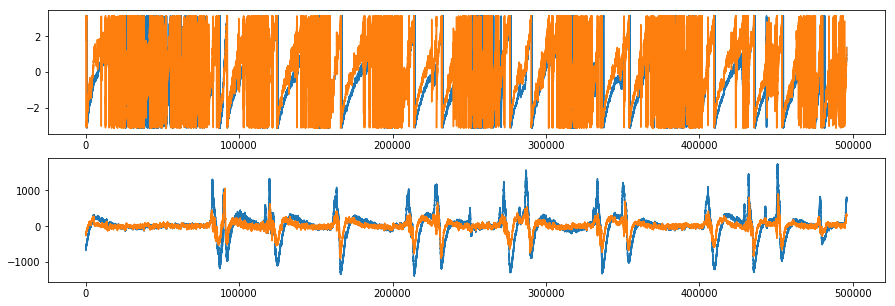

In [35]:
plt.figure(figsize=(15, 5))
plt.subplot(211)
plt.plot(instantaneous_phase[0])
plt.plot(instantaneous_phase[31])
plt.subplot(212)
plt.plot(rs[0])
plt.plot(rs[31])
plt.show()

In [8]:
B=np.arange(-math.pi,math.pi+0.15707963267948966,0.15707963267948966)

In [12]:
ph=np.empty((32))
H=np.zeros((np.shape(B)[0]-1,np.shape(rs)[1]))

for t in range(len(instantaneous_phase[0])):
    for ch in range(len(instantaneous_phase)):
#         print(ch,t)
        ph[ch]=instantaneous_phase[ch][t]
    hist, b = np.histogram(ph,bins=B)
    H[:,t]=hist
    ph=np.empty((32))
    

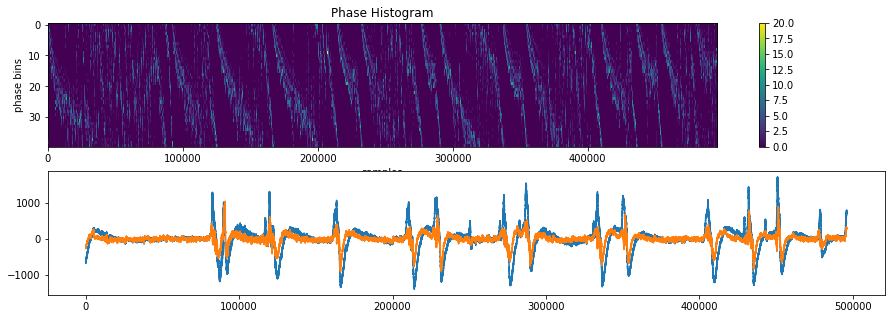

In [23]:
plt.figure(figsize=(15, 5))
plt.subplot(211)
ax=plt.imshow(H, aspect='auto')
ax.set_clim(0,20)
plt.colorbar(ax)
plt.title('Phase Histogram')
plt.ylabel('phase bins')
plt.xlabel('samples')
plt.subplot(212)
plt.plot(rs[0])
plt.plot(rs[31])


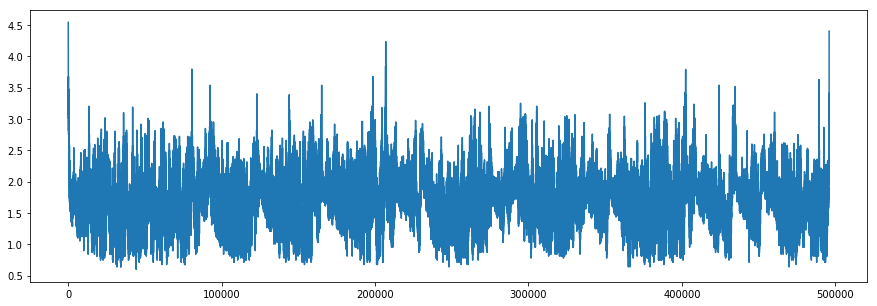

In [27]:
plt.figure(figsize=(15, 5))
plt.plot(H.std(0))

In [9]:
np.shape(B)[0]

41